In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("./data/emission/data.csv", sep=",")
df_melted = pd.melt(df,
                    id_vars=list(df.columns[:4]),
                    value_vars=list(df.columns[4:-1]),
                    var_name="Year",
                    value_name="CO2")
df_melted = (df_melted[["Country Code", "Year", "CO2"]]
            .rename(columns={"Country Code":"Code"})
            .dropna()
            .astype({'CO2': 'int64',
                     "Year": "int64",
                     "Code": "str"}))

In [3]:
co2_df = df_melted[df_melted["CO2"]>=0]
print(len(co2_df))
co2_df.head(20)

7408


,Code,Year,CO2
7981,AFE,1990,304614
7982,AFG,1990,2046
7983,AFW,1990,97190
7984,AGO,1990,6564
7985,ALB,1990,6060
7986,AND,1990,406
7987,ARB,1990,632472
7988,ARE,1990,55210
7989,ARG,1990,100313
7990,ARM,1990,19845


In [4]:
# LOAD EDI dataframe like in Tims notebook:
edi_df = pd.read_csv("data/electoral-democracy-index.csv")

# Read shapefile for world plotting
map_df = gpd.read_file('data/geodata/World_Countries.shp')
map_df = map_df.set_index('COUNTRY')
continent_map_df = pd.read_csv('data/country_continent_map.csv')
continent_map_df = continent_map_df.drop('Unnamed: 0', axis=1)

edi_df = edi_df.rename({"Electoral democracy index (best estimate, aggregate: average)": 'edi'}, axis=1)
continent_map_df = continent_map_df.rename({"iso_code": "Code"}, axis=1)

In [5]:
len(edi_df)

32837

In [6]:
edi_df = edi_df.astype({"Year":"int64"})
edi_co2_df = pd.merge(edi_df, co2_df, on=["Year", "Code"])

In [7]:
edi_df.columns

Index(['Entity', 'Code', 'Year', 'edi'], dtype='object')

In [8]:
len(edi_co2_df)

5319

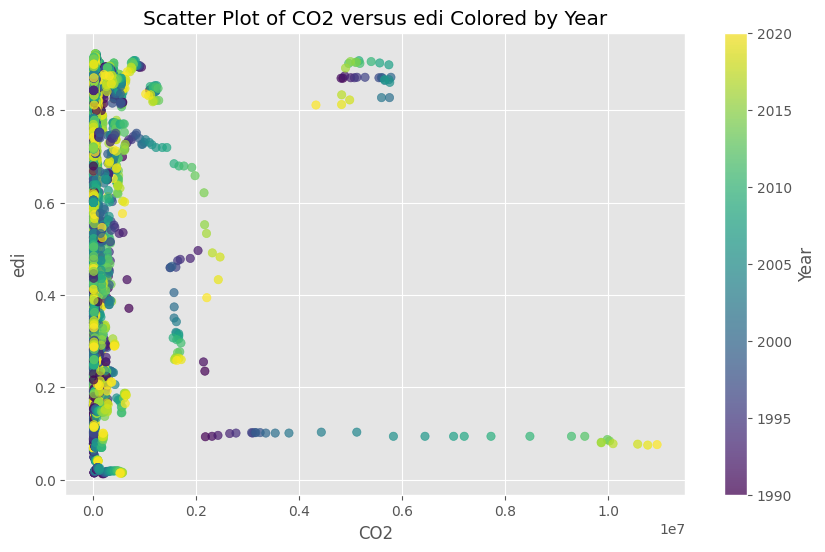

In [9]:
# Create the scatter plot with colors based on the year
plt.figure(figsize=(10, 6))
scatter = plt.scatter(edi_co2_df['CO2'], edi_co2_df['edi'], c=edi_co2_df['Year'], cmap='viridis', alpha=0.7)
plt.xlabel('CO2')
plt.ylabel('edi')
plt.title('Scatter Plot of CO2 versus edi Colored by Year')
plt.colorbar(scatter, label='Year')
plt.grid(True)

plt.show()


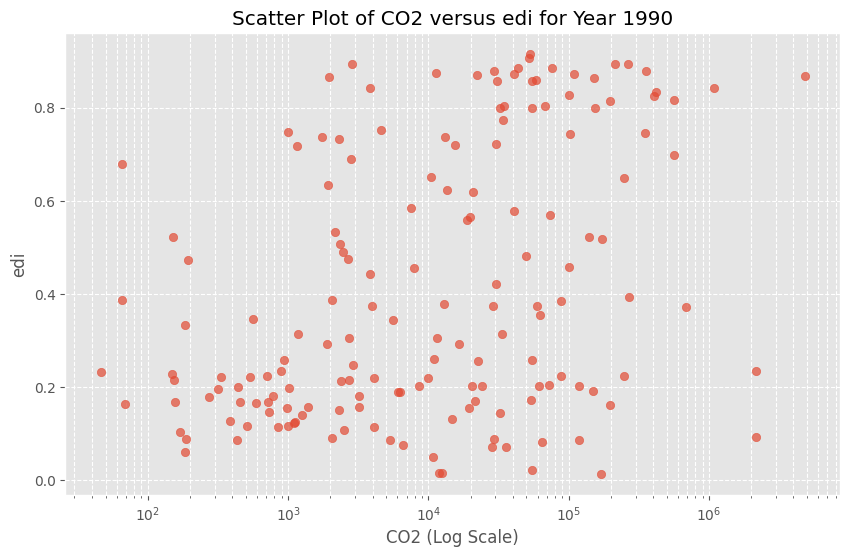

In [10]:
# Get the unique years in the dataframe
unique_years = edi_co2_df['Year'].unique()

# Create a scatter plot for each year
for year in unique_years[:1]:
    plt.figure(figsize=(10, 6))
    subset = edi_co2_df[edi_co2_df['Year'] == year]
    plt.scatter(subset['CO2'], subset['edi'], alpha=0.7)
    plt.xlabel('CO2 (Log Scale)')
    plt.ylabel('edi')
    plt.xscale('log')
    plt.title(f'Scatter Plot of CO2 versus edi for Year {year}')
    plt.grid(True, which="both", ls="--")
    plt.show()


In [11]:
# Calculate the correlation of edi and CO2 for each year
correlations = {}

for year in unique_years:
    subset = edi_co2_df[edi_co2_df['Year'] == year]
    correlation = subset['edi'].corr(subset['CO2'])
    correlations[year] = correlation

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Year', 'Correlation'])


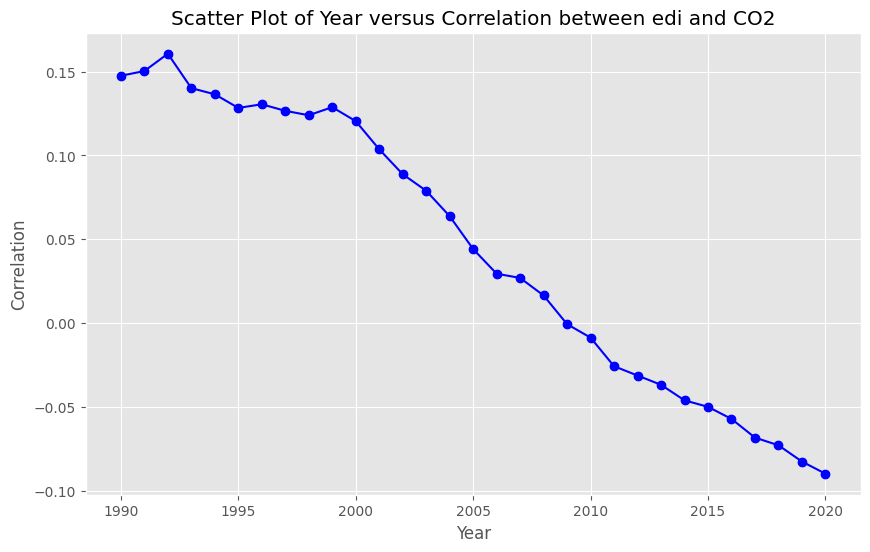

In [12]:
# Create a scatter plot for year versus correlation with lines connecting the dots
plt.figure(figsize=(10, 6))
plt.scatter(correlations_df['Year'], correlations_df['Correlation'], alpha=0.7, color='blue')
plt.plot(correlations_df['Year'], correlations_df['Correlation'], linestyle='-', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Scatter Plot of Year versus Correlation between edi and CO2')
plt.grid(True)

plt.show()


In [13]:
# Calculate the correlation of edi and CO2 for each year
correlations = {}

for year in unique_years:
    subset = edi_co2_df[edi_co2_df['Year'] == year]
    correlation = subset['edi'].corr(subset['co2log'])
    correlations[year] = correlation

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Year', 'Correlation'])


KeyError: 'co2log'

In [14]:
import math
math.log10(100)

2.0

In [62]:
import numpy as np
edi_co2_df["co2log"] = np.log10(edi_co2_df["CO2"])

/Users/pwecker/dev/DataVizDemocracy/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
